In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [3]:
all_file= glob.glob("./songData/*.xlsx")
len(all_file)

21

In [4]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[-1][9:])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
# data = pd.concat(data)
# pd.DataFrame(data)
# data = data.sample(frac = 1)
print(names)
print(count)
print(clusters)
print(len(data))

['songType0.xlsx', 'songType1.xlsx', 'songType10.xlsx', 'songType11.xlsx', 'songType12.xlsx', 'songType13.xlsx', 'songType14.xlsx', 'songType15.xlsx', 'songType16.xlsx', 'songType17.xlsx', 'songType18.xlsx', 'songType19.xlsx', 'songType2.xlsx', 'songType20.xlsx', 'songType3.xlsx', 'songType4.xlsx', 'songType5.xlsx', 'songType6.xlsx', 'songType7.xlsx', 'songType8.xlsx', 'songType9.xlsx']
[8, 1027, 43, 62, 127, 711, 58, 2, 5, 780, 11, 46, 13, 9, 762, 8, 58, 92, 207, 19, 57]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 3, 4, 5, 6, 7, 8, 9]
21


In [5]:
# import stemmer

from operator import index


valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set('')
stop_words_file_lines=open('stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = set()
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                # print('eta valid char list e nai ',each_char)
                if unique_words_per_sentence not in stop_words:
                    unique_words_per_sentence.add(correct_word.strip())
                correct_word = ''
        if unique_words_per_sentence not in stop_words:
            unique_words_per_sentence.add(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(unique_words_per_sentence)

    return new_refined_sentence



for each_dataframe in data:
    # print(len(each_dataframe['lyrics']))
    for idx in range(len(each_dataframe['lyrics'])):
        each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])
        # print(each_dataframe['lyrics'][idx])

# stemmer_obj=stemmer.BanglaStemmer()
#     # word.replace(word,stemmer_obj.stem(word))
#     # print(word,stemmer_obj.stem(word))

data = pd.concat(data)
pd.DataFrame(data)
data = data.sample(frac = 1)

data

C:\Users\Maraz Mia\AppData\Local\Temp\ipykernel_2152\2028748097.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])


,Unnamed: 0,lyrics,songType
456,2075,চেয়েছি বীণ চোখের ক করেছি ফোঁটা ডাকে কথা মেঘে ...,1
89,499,মায়াবী বহুদিন এসেছো বীথিতে জল কেটেযে গান ফেলে...,13
597,2572,পূর্নিমা চাওয়ার এক দিন পাড়ি ঘরে কাটাতে ভালব...,1
160,2993,ঢাকার ব্যাকুলতা বারতা বলার দেবে মনের ভুলে বুক...,7
304,1486,জল ঠাই তোমারও ফাঁকি সুখের তোমারে কান্দিয়া মওল...,13
...,...,...,...
249,1009,নামে ঘরের ঘরে চাচাই মন্ত্রীর হাতে বাজাও ওই থা...,3
426,1870,কখন তুলে বীণাখানি তখনি লবে বেলায় বাণী সভা প্র...,17
13,73,পরিচয় দুটি নীড়ে মধু বীণার একই সে ছিঁড়িল ধী...,1
14,1037,দেখেছি গান টানে মত উড়তে যদি কাগজের পাড়ে কত ...,9


In [33]:
# data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word not in ',./-?()/|{/}[]']))
# data['lyrics'][100:]

56     বসন্ত বাতাসে সইগো বসন্ত বাতাসে বন্ধুর বাড়ির ফু...
40     ভরা বাদর মাহ ভাদর শূন্য মন্দির মোর।। ঝম্পি ঘন ...
268    অস্তাচলে জীবন আমার, এপার ওপার সূর্য ডোবার ছবি ...
105    প্রেমেতে অন্ধ হলাম দোষ দিবি তাতে, বন্ধু তোকে খ...
55     দেনা আমায় ছোট্ট সোনার গাঁয় যেথায় কোকিল ডাকে কু...
                             ...                        
154    মন মাঝি ভাটির টানে সুদূরে উদাসী এক বাউল হয়ে পি...
214    গো মন ছন্দবিহীন ছন্দে গেয়ে হারালো সুর চোখে চেয়...
178    নিশি নিঝুম ঘুম আসে, প্রিয়, কোথা দূর প্রবাসে।।...
970    নীলা ভালবাসা কাঁদে বুক চিরে চিরে প্রেম নেই, নে...
489    তারপরেতে ভালো ঢাকা শহর দালানকোঠা গেলো। দালানকো...
Name: lyrics, Length: 4005, dtype: object

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################
############### classifier setup ################

from sklearn.ensemble import RandomForestClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',RandomForestClassifier(
                 n_estimators=100,
                 criterion="gini",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 bootstrap=False,
                 oob_score=False,
                 n_jobs=None,
                 random_state=None,
                 verbose=0,
                 warm_start=False,
                 ccp_alpha=0.0,
                 max_samples=None)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
5

predicted = classifier.predict(X_test)

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\

Cross Accuracy: 0.48 (+/- 0.04)


In [107]:
# joblib.dump(classifier, './Model/rf_model.pickle')

['../Model/sample_model.pickle']

In [8]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.48 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.35      0.80      0.49       332
           2       0.00      0.00      0.00         5
           3       0.50      0.23      0.32       262
           4       1.00      0.25      0.40         4
           5       0.25      0.05      0.08        20
           6       0.88      0.21      0.34        33
           7       0.89      0.12      0.21        66
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         7
          11       0.33      0.05      0.09        20
          12       0.00      0.00      0.00        32
          13       0.63      0.22      0.32       248
          14       1.00      0.18      0.31        22
          16       0.00      0.00      0.00         3
          17       0.66      0.88      0.75      

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [9]:
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

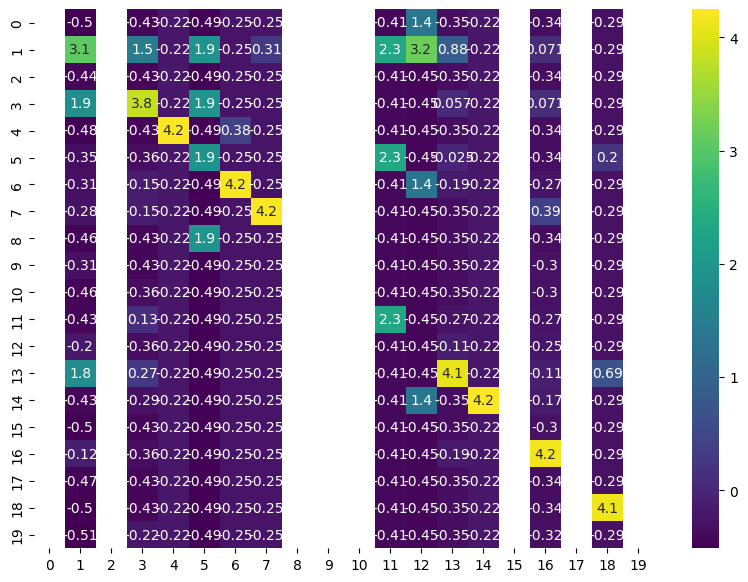

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')